# 📊 Week 3-5: 평가지표 완전 정복! (혼동행렬, 정밀도, 재현율)

## 🤔 정확도만으로는 부족한 이유

**지금까지**: "정확도 95%야! 좋네!" ← **이것만 알았음**

**하지만 현실**:
- 📧 **스팸 분류**: 정확도 95% vs 재현율 60% 중 뭐가 중요?
- 🏥 **암 진단**: 정확도 98% vs 재현율 70% 중 뭐가 생명과 직결?
- 💳 **신용카드 사기**: 정밀도 80% vs 재현율 90% 중 뭐가 경제적?

## 🎯 오늘의 미션
**정확도를 넘어선 진짜 평가지표 마스터!**

### 📚 배울 내용
1. **혼동행렬 (Confusion Matrix)** - 실제로 뭘 틀렸는지 보기
2. **정밀도 (Precision)** - 예측한 것 중 맞은 비율
3. **재현율 (Recall)** - 실제 정답 중 찾은 비율  
4. **F1-Score** - 정밀도 + 재현율 조화평균
5. **실무 상황별** 최적 지표 선택법

---


## 📖 혼동행렬 (Confusion Matrix) 쉽게 이해하기

### 🤔 **혼동행렬이 뭐야?**
**AI가 어떤 실수를 했는지 한눈에 보여주는 표!**

### 📊 **간단한 2x2 표**

| | **AI 예측: 아니다** | **AI 예측: 맞다** |
|---|:---:|:---:|
| **실제: 아니다** | ✅ 맞음 | ❌ 틀림 (거짓 경보) |
| **실제: 맞다** | ❌ 틀림 (놓침) | ✅ 맞음 |

### 💡 **4가지 경우 (TN, FP, FN, TP 완전 이해!)**

**🤔 용어가 어려워 보이지만 논리적이에요:**

1. **TN (True Negative)** = **진짜로 음성** ✅
   - "setosa 아니야"라고 예측 + 실제로도 setosa 아님
   - **맞게 거부한 경우**

2. **FP (False Positive)** = **거짓으로 양성** ❌ 
   - "setosa야!"라고 예측 + 실제로는 setosa 아님
   - **잘못 경보한 경우** (거짓 경보)

3. **FN (False Negative)** = **거짓으로 음성** ❌
   - "setosa 아니야"라고 예측 + 실제로는 setosa임  
   - **놓친 경우** (미탐지)

4. **TP (True Positive)** = **진짜로 양성** ✅
   - "setosa야!"라고 예측 + 실제로도 setosa임
   - **맞게 발견한 경우**

### 🧠 **외우는 팁**:
- **True** = 맞음, **False** = 틀림
- **Positive** = "있다/맞다"고 예측, **Negative** = "없다/아니다"고 예측

### 🏥 **실생활 예시: 암 진단으로 이해하기**

| | **AI 진단: 건강** | **AI 진단: 암** |
|---|:---:|:---:|
| **실제: 건강** | **TN** ✅ | **FP** ❌ (거짓 경보) |
| **실제: 암** | **FN** ❌ (놓침) | **TP** ✅ |

**각각의 의미**:
- **TN**: 건강한 사람을 건강하다고 정확히 진단 ✅
- **FP**: 건강한 사람을 암이라고 잘못 진단 ❌ (불안감, 불필요한 검사)
- **FN**: 암 환자를 건강하다고 잘못 진단 ❌ (치료 시기 놓침, 매우 위험!)
- **TP**: 암 환자를 암이라고 정확히 진단 ✅

**🤔 어떤 실수가 더 위험할까요?**
→ **FN (놓침)**이 **FP (거짓 경보)**보다 훨씬 위험!


In [185]:
# 🛠️ 도구 준비 (필요한 것만!)
import pandas as pd
import matplotlib.pyplot as plt

# 🎨 한글 폰트 설정 (matplotlib 한글 깨짐 방지)
plt.rcParams['font.family'] = ['Apple SD Gothic Neo', 'Nanum Gothic', 'AppleGothic']
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
print("🎨 한글 폰트 설정 완료! (macOS 최적화)")
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, 
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings('ignore')

print("🔧 평가지표 도구 준비 완료!")
print("📊 실제로 사용하는 도구들:")
print("   🔍 confusion_matrix - 혼동행렬 생성")
print("   📈 precision_score - 정밀도 계산")
print("   🎯 recall_score - 재현율 계산")  
print("   ⚖️ f1_score - F1-Score 계산")
print("   📋 classification_report - 종합 보고서")
print("   🎨 ConfusionMatrixDisplay - 시각화")
print("   📊 pandas - 깔끔한 표 만들기")
print("   📈 matplotlib - 그래프 그리기")

print("\n🎯 목표: 평가지표로 AI의 진짜 실력 파악하기!")


🎨 한글 폰트 설정 완료! (macOS 최적화)
🔧 평가지표 도구 준비 완료!
📊 실제로 사용하는 도구들:
   🔍 confusion_matrix - 혼동행렬 생성
   📈 precision_score - 정밀도 계산
   🎯 recall_score - 재현율 계산
   ⚖️ f1_score - F1-Score 계산
   📋 classification_report - 종합 보고서
   🎨 ConfusionMatrixDisplay - 시각화
   📊 pandas - 깔끔한 표 만들기
   📈 matplotlib - 그래프 그리기

🎯 목표: 평가지표로 AI의 진짜 실력 파악하기!


## 🌸 실습 1: 이진 분류로 기본 개념 익히기

**시나리오**: 아이리스 꽃 중에서 **setosa vs 나머지** 구분하기
- setosa = 1 (양성)
- 나머지 = 0 (음성)
- **이진 분류로 평가지표 완전 이해!**


In [186]:
# 🌸 아이리스 데이터 준비 (이진 분류로 변환)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# setosa(0) vs 나머지(1,2) 이진 분류로 변환
y_binary = (y == 0).astype(int)  # setosa면 1, 나머지면 0

print("🌸 이진 분류 데이터 정보:")
print(f"   🌺 총 꽃 개수: {len(y_binary)}개")
print(f"   📊 setosa(1): {sum(y_binary)}개")
print(f"   🌿 나머지(0): {len(y_binary) - sum(y_binary)}개")
print(f"   ⚖️ 클래스 비율: setosa {sum(y_binary)/len(y_binary)*100:.1f}% vs 나머지 {(1-sum(y_binary)/len(y_binary))*100:.1f}%")

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, random_state=42
)

print(f"\n✂️ 데이터 분할:")
print(f"   📚 훈련: {len(y_train)}개 (setosa {sum(y_train)}개)")
print(f"   🧪 테스트: {len(y_test)}개 (setosa {sum(y_test)}개)")


🌸 이진 분류 데이터 정보:
   🌺 총 꽃 개수: 150개
   📊 setosa(1): 50개
   🌿 나머지(0): 100개
   ⚖️ 클래스 비율: setosa 33.3% vs 나머지 66.7%

✂️ 데이터 분할:
   📚 훈련: 105개 (setosa 31개)
   🧪 테스트: 45개 (setosa 19개)


🌳 Decision Tree 예측 완료!
   🎯 정확도: 100.0%

📊 혼동행렬 (표 형태):
            예측: 나머지  예측: setosa
실제: 나머지          26           0
실제: setosa        0          19


<Figure size 800x600 with 0 Axes>

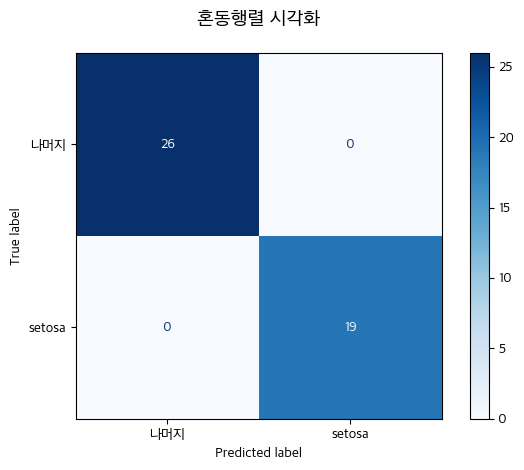


💡 결과 해석:
   ✅ 정답: 45개 (나머지 26개 + setosa 19개)
   ❌ 오답: 0개
   🎉 완벽한 예측! 모든 테스트 케이스를 정확히 맞춤


In [187]:
# 🌳 Decision Tree로 모델 훈련 및 예측
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("🌳 Decision Tree 예측 완료!")
print(f"   🎯 정확도: {accuracy_score(y_test, y_pred)*100:.1f}%")

# 🎨 혼동행렬 예쁘게 시각화
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# 1. pandas로 깔끔한 표 만들기
print("\n📊 혼동행렬 (표 형태):")
print("="*40)
cm_df = pd.DataFrame(
    cm, 
    index=['실제: 나머지', '실제: setosa'],
    columns=['예측: 나머지', '예측: setosa']
)
print(cm_df)
print("="*40)

# 2. matplotlib로 컬러풀한 시각화
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['나머지', 'setosa'])
disp.plot(cmap='Blues', values_format='d')
plt.title('혼동행렬 시각화', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

print(f"\n💡 결과 해석:")
print(f"   ✅ 정답: {tn + tp}개 (나머지 {tn}개 + setosa {tp}개)")
print(f"   ❌ 오답: {fp + fn}개")
if fp + fn > 0:
    print(f"      • 거짓경보: {fp}개 (나머지를 setosa로 착각)")
    print(f"      • 놓침: {fn}개 (setosa를 나머지로 착각)")
else:
    print(f"   🎉 완벽한 예측! 모든 테스트 케이스를 정확히 맞춤")


## 📏 핵심 평가지표 3가지 (TN, FP, FN, TP로 계산!)

### 💡 **쉬운 설명**:
1. **정밀도 (Precision)**: "setosa라고 예측한 것 중에 진짜 setosa 비율"
   - 공식: **TP / (TP + FP)**
   - 의미: 거짓경보(FP)를 얼마나 줄였나?
   
2. **재현율 (Recall)**: "실제 setosa 중에 찾아낸 비율"  
   - 공식: **TP / (TP + FN)**
   - 의미: 놓친 것(FN)을 얼마나 줄였나?
   
3. **F1-Score**: "정밀도와 재현율의 균형점"
   - 공식: **2 × (정밀도 × 재현율) / (정밀도 + 재현율)**
   - 의미: 둘 다 고려한 종합 점수

### 🧮 **TN, FP, FN, TP로 이해하는 공식**:
```
정확도 = (TP + TN) / (TP + TN + FP + FN)  ← 전체 중 맞은 비율
정밀도 = TP / (TP + FP)                    ← 예측한 양성 중 진짜 양성
재현율 = TP / (TP + FN)                    ← 실제 양성 중 찾은 양성
```

### 🎯 **암 진단 예시로 이해하기**:
- **정밀도 높음** = 암이라고 진단하면 정말 암일 확률 높음 (거짓 경보 적음)
- **재현율 높음** = 실제 암 환자를 놓치지 않고 잘 찾아냄 (미탐지 적음)



## 🚀 실습 2: 더 도전적인 예제 (불균형 데이터)


In [188]:
# 🎯 더 도전적인 분류: versicolor vs 나머지 (불균형 데이터)
# versicolor는 중간 종이라서 구분하기 더 어려움!

# versicolor(1) vs 나머지(setosa + virginica) 이진 분류
y_challenge = (y == 1).astype(int)  # versicolor면 1, 나머지면 0

print("🎯 도전적인 이진 분류 데이터:")
print(f"   🌸 총 꽃 개수: {len(y_challenge)}개")
print(f"   🟡 versicolor(1): {sum(y_challenge)}개")
print(f"   🌿 나머지(0): {len(y_challenge) - sum(y_challenge)}개")
print(f"   ⚖️ 클래스 비율: versicolor {sum(y_challenge)/len(y_challenge)*100:.1f}% vs 나머지 {(1-sum(y_challenge)/len(y_challenge))*100:.1f}%")

# 더 어렵게 만들기: 데이터 적게 사용
X_train_hard, X_test_hard, y_train_hard, y_test_hard = train_test_split(
    X, y_challenge, test_size=0.7, random_state=123  # 70%를 테스트로! (어려움)
)

print(f"\n✂️ 어려운 데이터 분할:")
print(f"   📚 훈련: {len(y_train_hard)}개 (versicolor {sum(y_train_hard)}개)")
print(f"   🧪 테스트: {len(y_test_hard)}개 (versicolor {sum(y_test_hard)}개)")

# 🤖 AI 모델 훈련
model_hard = DecisionTreeClassifier(random_state=42, max_depth=3)  # 깊이 제한으로 더 어렵게
model_hard.fit(X_train_hard, y_train_hard)
y_pred_hard = model_hard.predict(X_test_hard)

print(f"\n🌳 어려운 예측 완료!")
print(f"   🎯 정확도: {accuracy_score(y_test_hard, y_pred_hard)*100:.1f}%")


🎯 도전적인 이진 분류 데이터:
   🌸 총 꽃 개수: 150개
   🟡 versicolor(1): 50개
   🌿 나머지(0): 100개
   ⚖️ 클래스 비율: versicolor 33.3% vs 나머지 66.7%

✂️ 어려운 데이터 분할:
   📚 훈련: 45개 (versicolor 19개)
   🧪 테스트: 105개 (versicolor 31개)

🌳 어려운 예측 완료!
   🎯 정확도: 96.2%


📊 도전적인 혼동행렬:
                예측: 나머지  예측: versicolor
실제: 나머지              72               2
실제: versicolor        2              29


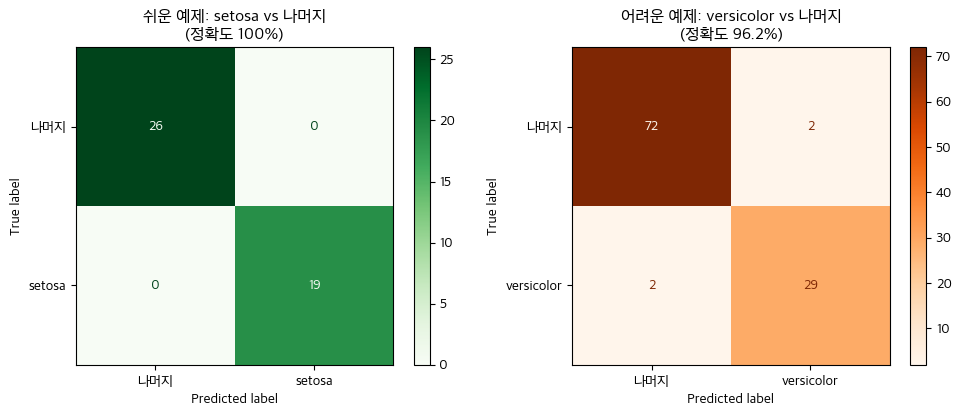


💡 어려운 예제 결과:
   ✅ 정답: 101개 (나머지 72개 + versicolor 29개)
   ❌ 오답: 4개
      • 거짓경보 (FP): 2개 (나머지를 versicolor로 착각)
      • 놓침 (FN): 2개 (versicolor를 나머지로 착각)

🔍 실수 분석:
   📈 FP > FN: AI가 과민반응 (너무 많이 versicolor라고 예측)
   🎯 FN > FP: AI가 둔감반응 (versicolor를 놓침)

🆚 쉬운 vs 어려운 예제 비교:
   🟢 setosa 분류: FP=0, FN=0 (완벽)
   🟠 versicolor 분류: FP=2, FN=2 (도전적)


In [189]:
# 🎨 도전적인 예제의 혼동행렬 분석
cm_hard = confusion_matrix(y_test_hard, y_pred_hard)
tn_h, fp_h, fn_h, tp_h = cm_hard.ravel()

print("📊 도전적인 혼동행렬:")
print("="*50)
cm_hard_df = pd.DataFrame(
    cm_hard, 
    index=['실제: 나머지', '실제: versicolor'],
    columns=['예측: 나머지', '예측: versicolor']
)
print(cm_hard_df)
print("="*50)

# 시각화
plt.figure(figsize=(10, 4))

# 쉬운 예제 vs 어려운 예제 비교
plt.subplot(1, 2, 1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['나머지', 'setosa'])
disp1.plot(cmap='Greens', values_format='d', ax=plt.gca())
plt.title('쉬운 예제: setosa vs 나머지\n(정확도 100%)', fontsize=12)

plt.subplot(1, 2, 2)  
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_hard, display_labels=['나머지', 'versicolor'])
disp2.plot(cmap='Oranges', values_format='d', ax=plt.gca())
plt.title(f'어려운 예제: versicolor vs 나머지\n(정확도 {accuracy_score(y_test_hard, y_pred_hard)*100:.1f}%)', fontsize=12)

plt.tight_layout()
plt.show()

print(f"\n💡 어려운 예제 결과:")
print(f"   ✅ 정답: {tn_h + tp_h}개 (나머지 {tn_h}개 + versicolor {tp_h}개)")
print(f"   ❌ 오답: {fp_h + fn_h}개")
if fp_h + fn_h > 0:
    print(f"      • 거짓경보 (FP): {fp_h}개 (나머지를 versicolor로 착각)")
    print(f"      • 놓침 (FN): {fn_h}개 (versicolor를 나머지로 착각)")
    print(f"\n🔍 실수 분석:")
    print(f"   📈 FP > FN: AI가 과민반응 (너무 많이 versicolor라고 예측)")
    print(f"   🎯 FN > FP: AI가 둔감반응 (versicolor를 놓침)")
else:
    print(f"   🎉 이것도 완벽! (데이터가 너무 쉬운 듯)")

print(f"\n🆚 쉬운 vs 어려운 예제 비교:")
print(f"   🟢 setosa 분류: FP={fp}, FN={fn} (완벽)")
print(f"   🟠 versicolor 분류: FP={fp_h}, FN={fn_h} (도전적)")


In [190]:
# 📋 classification_report로 종합 분석
print("📋 어려운 예제 종합 보고서:")
print("="*60)
print(classification_report(y_test_hard, y_pred_hard, target_names=['나머지', 'versicolor'], digits=3))

# 📊 평가지표 비교 계산
precision_hard = precision_score(y_test_hard, y_pred_hard)
recall_hard = recall_score(y_test_hard, y_pred_hard)
f1_hard = f1_score(y_test_hard, y_pred_hard)
accuracy_hard = accuracy_score(y_test_hard, y_pred_hard)

print("\n📊 어려운 예제 상세 평가지표:")
print("="*60)
print(f"🔢 혼동행렬 구성요소:")
print(f"   TN (나머지→나머지): {tn_h}")
print(f"   FP (나머지→versicolor): {fp_h}")  
print(f"   FN (versicolor→나머지): {fn_h}")
print(f"   TP (versicolor→versicolor): {tp_h}")

print(f"\n💯 평가지표 계산:")
print(f"   🎯 정확도: {accuracy_hard:.3f} = ({tp_h}+{tn_h})/({tp_h}+{tn_h}+{fp_h}+{fn_h}) = {tp_h+tn_h}/{tp_h+tn_h+fp_h+fn_h}")
print(f"   📈 정밀도: {precision_hard:.3f} = {tp_h}/({tp_h}+{fp_h}) = {tp_h}/{tp_h+fp_h}")
print(f"   🎯 재현율: {recall_hard:.3f} = {tp_h}/({tp_h}+{fn_h}) = {tp_h}/{tp_h+fn_h}")
print(f"   ⚖️ F1-Score: {f1_hard:.3f}")

print(f"\n🔍 실무적 해석:")
if precision_hard > recall_hard:
    print(f"   📈 정밀도({precision_hard:.3f}) > 재현율({recall_hard:.3f})")
    print(f"   💡 AI가 신중함: versicolor라고 예측하면 거의 맞음 (거짓경보 적음)")
    print(f"   ⚠️  하지만 실제 versicolor를 놓칠 가능성 있음")
elif recall_hard > precision_hard:
    print(f"   🎯 재현율({recall_hard:.3f}) > 정밀도({precision_hard:.3f})")
    print(f"   💡 AI가 적극적: 실제 versicolor를 잘 찾아냄 (놓침 적음)")
    print(f"   ⚠️  하지만 거짓경보가 많을 수 있음")
else:
    print(f"   ⚖️ 정밀도와 재현율이 균형: {precision_hard:.3f}")
    print(f"   💡 AI가 안정적: 거짓경보와 놓침의 균형이 좋음")


📋 어려운 예제 종합 보고서:
              precision    recall  f1-score   support

         나머지      0.973     0.973     0.973        74
  versicolor      0.935     0.935     0.935        31

    accuracy                          0.962       105
   macro avg      0.954     0.954     0.954       105
weighted avg      0.962     0.962     0.962       105


📊 어려운 예제 상세 평가지표:
🔢 혼동행렬 구성요소:
   TN (나머지→나머지): 72
   FP (나머지→versicolor): 2
   FN (versicolor→나머지): 2
   TP (versicolor→versicolor): 29

💯 평가지표 계산:
   🎯 정확도: 0.962 = (29+72)/(29+72+2+2) = 101/105
   📈 정밀도: 0.935 = 29/(29+2) = 29/31
   🎯 재현율: 0.935 = 29/(29+2) = 29/31
   ⚖️ F1-Score: 0.935

🔍 실무적 해석:
   ⚖️ 정밀도와 재현율이 균형: 0.935
   💡 AI가 안정적: 거짓경보와 놓침의 균형이 좋음


## 🎯 실무 상황별 최적 지표 선택법

### 💼 **어떤 지표를 중시해야 할까?**

| **상황** | **중요한 지표** | **이유** | **예시** |
|---|---|---|---|
| **생명과 직결** | **재현율** | 놓치면 안 되는 상황 | 암 진단, 코로나 검사 |
| **비용이 중요** | **정밀도** | 거짓경보 비용이 큰 상황 | 스팸 메일, 보안 경보 |
| **균형이 중요** | **F1-Score** | 둘 다 고려해야 하는 상황 | 추천 시스템, 일반 분류 |
| **전체적 성능** | **정확도** | 클래스가 균형 잡힌 상황 | 이미지 분류, 텍스트 분류 |

### 🏥 **예시 1: 암 진단 AI**
```python
# 🎯 재현율이 최우선!
# FN(암을 놓침) > FP(건강한데 암이라고 함)
# "혹시라도 놓치면 안 되니까 예민하게 설정"
recall_target = 0.95  # 재현율 95% 이상 필수!
```

### 📧 **예시 2: 스팸 메일 분류 AI**  
```python
# 📈 정밀도가 최우선!
# FP(중요 메일을 스팸으로) > FN(스팸을 받은편지함으로)
# "중요한 메일을 스팸으로 보내면 큰일!"
precision_target = 0.90  # 정밀도 90% 이상 필수!
```

### 🛒 **예시 3: 쇼핑몰 추천 AI**
```python
# ⚖️ F1-Score가 최우선!
# 정밀도, 재현율 둘 다 중요
# "관련 없는 상품 추천도 싫고, 좋은 상품 놓치는 것도 싫어"
f1_target = 0.85  # F1-Score 85% 이상 목표!
```


## 🎉 Week 3 평가지표 완전 정복 완료!

### ✅ **오늘 배운 핵심 내용**:

1. **🔍 혼동행렬 (Confusion Matrix)**
   - TN, FP, FN, TP의 의미와 계산법
   - AI의 실수 유형을 한눈에 파악

2. **📏 핵심 평가지표 4가지**
   - **정확도**: 전체적인 맞춘 비율
   - **정밀도**: 예측한 양성 중 진짜 양성 비율 (거짓경보 방지)
   - **재현율**: 실제 양성 중 찾은 양성 비율 (놓침 방지)  
   - **F1-Score**: 정밀도와 재현율의 조화평균 (균형점)

3. **🎯 상황별 지표 선택**
   - **생명중요**: 재현율 우선 (놓치면 안됨)
   - **비용중요**: 정밀도 우선 (거짓경보 비용 큼)
   - **균형중요**: F1-Score 우선 (둘 다 고려)

### 🚀 **다음 단계**:
- **Week 4**: 더 복잡한 AI 모델들 (신경망, 딥러닝 기초)
- **실제 데이터**: 타이타닉, 집값 예측 등 실무 프로젝트

**축하합니다! 이제 AI 모델의 진짜 성능을 평가할 수 있어요!** 🎊


In [191]:
# 📏 모든 평가지표 계산
# 혼동행렬에서 값 추출
tn, fp, fn, tp = cm.ravel()

# 수동 계산
accuracy_manual = (tp + tn) / (tp + tn + fp + fn)
precision_manual = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_manual = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual) if (precision_manual + recall_manual) > 0 else 0

# sklearn 함수 계산
accuracy_sklearn = accuracy_score(y_test, y_pred)
precision_sklearn = precision_score(y_test, y_pred)
recall_sklearn = recall_score(y_test, y_pred)
f1_sklearn = f1_score(y_test, y_pred)

print("📏 평가지표 상세 분석:")
print("="*60)

print(f"\n🔢 혼동행렬 구성요소:")
print(f"   TN (나머지→나머지): {tn}")
print(f"   FP (나머지→setosa): {fp}")  
print(f"   FN (setosa→나머지): {fn}")
print(f"   TP (setosa→setosa): {tp}")

print(f"\n📊 평가지표 (수동 계산):")
print(f"   🎯 정확도: {accuracy_manual:.3f} = ({tp}+{tn})/({tp}+{tn}+{fp}+{fn}) = {tp+tn}/{tp+tn+fp+fn}")
print(f"   📈 정밀도: {precision_manual:.3f} = {tp}/({tp}+{fp}) = {tp}/{tp+fp}")
print(f"   🎯 재현율: {recall_manual:.3f} = {tp}/({tp}+{fn}) = {tp}/{tp+fn}")
print(f"   ⚖️ F1-Score: {f1_manual:.3f}")

print(f"\n✅ sklearn 함수 결과 (검증):")
print(f"   🎯 정확도: {accuracy_sklearn:.3f}")
print(f"   📈 정밀도: {precision_sklearn:.3f}")
print(f"   🎯 재현율: {recall_sklearn:.3f}")
print(f"   ⚖️ F1-Score: {f1_sklearn:.3f}")

print(f"\n💡 해석:")
print(f"   • 예측한 setosa {tp+fp}개 중 {tp}개가 실제 setosa (정밀도 {precision_sklearn*100:.1f}%)")
print(f"   • 실제 setosa {tp+fn}개 중 {tp}개를 찾아냄 (재현율 {recall_sklearn*100:.1f}%)")
print(f"   • 정밀도와 재현율의 균형점: F1-Score {f1_sklearn:.3f}")


📏 평가지표 상세 분석:

🔢 혼동행렬 구성요소:
   TN (나머지→나머지): 26
   FP (나머지→setosa): 0
   FN (setosa→나머지): 0
   TP (setosa→setosa): 19

📊 평가지표 (수동 계산):
   🎯 정확도: 1.000 = (19+26)/(19+26+0+0) = 45/45
   📈 정밀도: 1.000 = 19/(19+0) = 19/19
   🎯 재현율: 1.000 = 19/(19+0) = 19/19
   ⚖️ F1-Score: 1.000

✅ sklearn 함수 결과 (검증):
   🎯 정확도: 1.000
   📈 정밀도: 1.000
   🎯 재현율: 1.000
   ⚖️ F1-Score: 1.000

💡 해석:
   • 예측한 setosa 19개 중 19개가 실제 setosa (정밀도 100.0%)
   • 실제 setosa 19개 중 19개를 찾아냄 (재현율 100.0%)
   • 정밀도와 재현율의 균형점: F1-Score 1.000
